#결정 트리

일반적으로 이 코드들을 돌리면 결과(모델)이 나오지 그 모델이 왜 이렇게 계수를 결정했는지 알지 못한다.

이를 위해 결정트리는 것을 이용해서 설명을 하고자 한다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


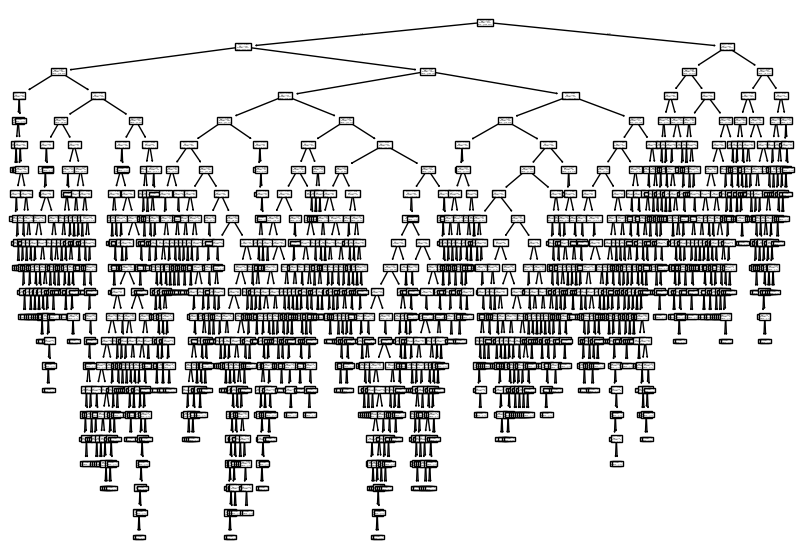

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

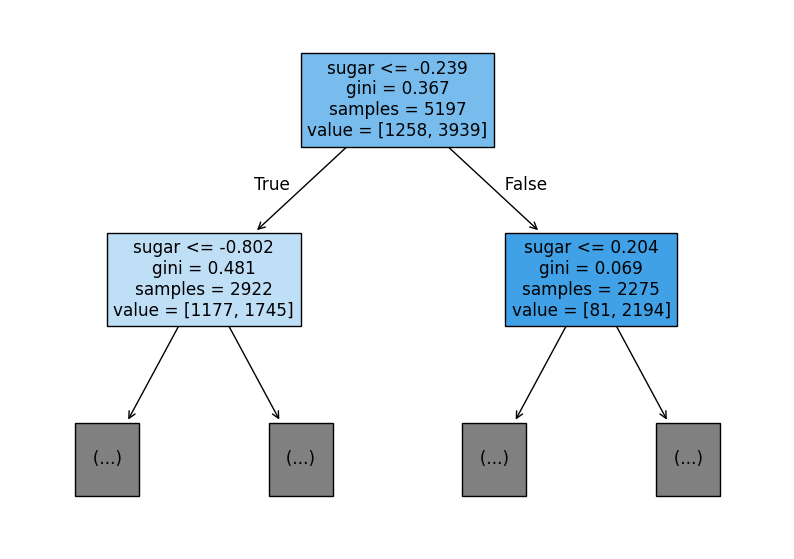

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

gini는 지니 불순도를 뜻한다. ( 지니 불순도 = 1 - ( 음성클래스 비율 ^ 2 + 양성클래스비율 ^ 2 ) )

불순도의 차이는 다음과 같이 구한다. 부모의 불순도 - ( ( 왼쪽 노드 샘플 수 / 부모의 샘플 수 ) * 왼쪽 노드의 불순도 + ( 오른쪽 노드 샘플 수 / 부모의 샘플 수 ) * 오른쪽 노드의 불순도 )

지니 불순도 또한 아니라 엔트로피 불순도는 다음과 같이 구한다.
\- 음성 클래스의 비율 * log2( 음성 클래스의 비율 ) \- 양성 클래스의 비율 * log2( 양성 클래스의 비율 )

이 결정트리를 나눌 때는 불순도의 차이(정보 이득)를 이용해서 이 값이 큰 수를 기준으로 결정 트리를 나눈다.

###가지 치기

max_depth를 정하므로써 불필요한 값들을 제외할 수 있다.

In [7]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


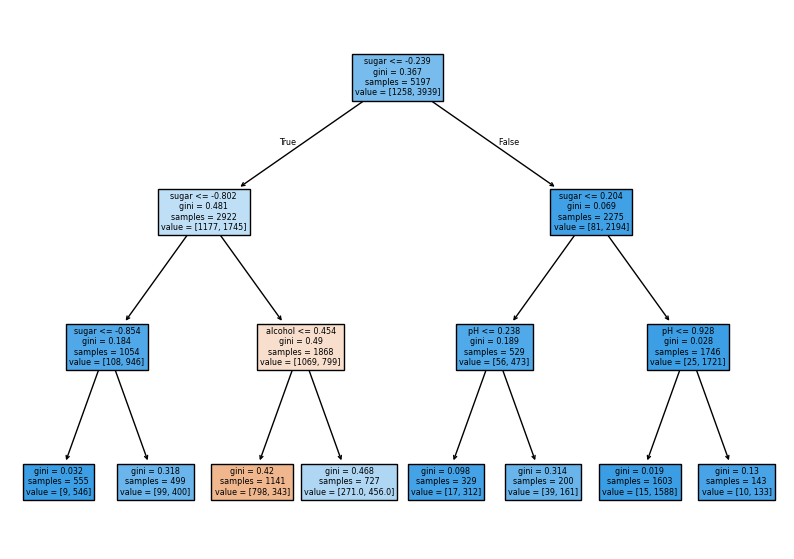

In [9]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

이 결정트리는 따로 표준화 할 필요가 없다는 장점을 가지고 있다.

In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


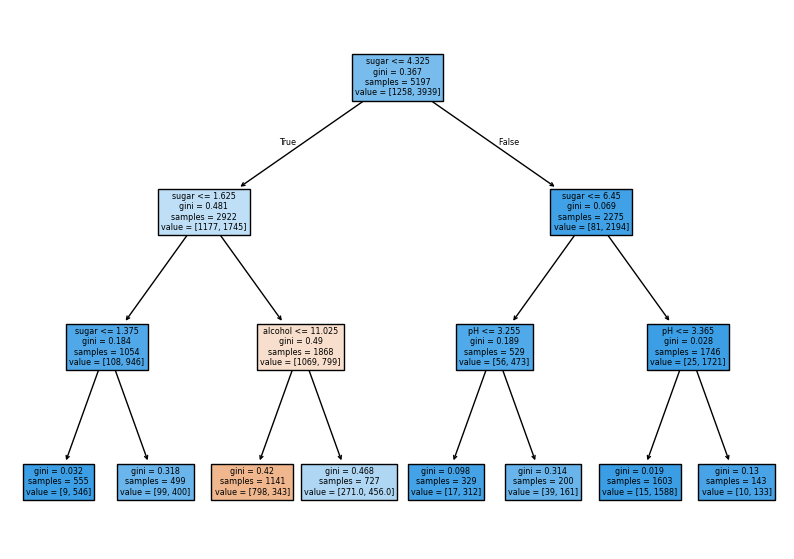

In [11]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [12]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


#교차 검증과 그리드 서치

In [13]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


##교차 검증

훈련세트, 검증세트, 테스트 세트 이렇게 3개를 나누면, 이 과정에서 훈련 세트가 손실이 일어난다. 이를 각자 하나씩 검증 세트로 사용하면서 하는 것이 3-폴드 교차검증이라고 한다.

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01282835, 0.01204658, 0.01257825, 0.01264167, 0.0118134 ]), 'score_time': array([0.00231457, 0.00179744, 0.0020206 , 0.00197029, 0.00184131]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [18]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


만약 그냥 데이터에 섞지 않고, 이를 수행하기 위해서는 그냥 KFold 분할기을 가지고, 이를 나눈다.

In [19]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


이떄, KFold 분할기에서 n_splits 매개 변수를 통해서 이를 N번 나눌지 결정한다.

In [20]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


##하이퍼 파라미터를 위한 그리드 서치

하이퍼 파라미터는 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터를 말한다. 이런 파라미터가 많아서 다양하게 이 값들을 변경해 가면서 이를 조정한다.

이때, 매개변수가 굉장히 많아지면 이를 구하기 어려워진다. 그래서 이를 그리드 서치를 통해 해결한다.

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

0.9615162593804117
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [25]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [27]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001 , 0.0001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(2, 100, 10)
          }
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
0.8683865773302731


범위나 간격을 미리 정하는 것이 아닌 그냥 랜덤하게 뽑는 방식을 사용할 수 있다.

###랜덤 서치

In [32]:
from scipy.stats import randint, uniform
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25),
          }
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, n_jobs=-1, n_iter=100, random_state=42)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077


#앙상블 학습

정형 데이터에 대한 학습으로 뛰어난 성능으로 보이는 것이 앙상블 학습이다.

##랜덤 포레스트

앙상블 학습의 대표적인 주자가 랜덤 포레스트이다.

결정 트리를 여러개 선택하는데 샘플을 선택할 때, 부트스트랩 방식으로 샘플을 뽑는다. 즉, 증복이 가능하게 뽑는다는 것이다.

또한, 결정 트리를 만들면서 일부 특성을 무작위로 뽑고, 그것을 토대로 노드를 분할한다. 회귀일 때는 모든 특성을 사용한다.

In [33]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [34]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


결정 세트에서 선택되지 않은 것들을 이용해서 검증세트로 이용이 가능하다. 이를 OOB라고 하는 데 이를 검증 세트처럼 사용해 보자

In [35]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


##엑스트라 트리

랜덤포레스트와 달리 부트 스트랩 샘플을 이용하지 않는다.

여기에서 사용하는 것은 결정 트리에서 splitter 파라미터를 'random'으로 설정하여 샘플을 설정하는 방법을 사용한다.

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
et.fit(train_input, train_target)
print(et.feature_importances_)

0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


##그레이디언트 부스팅

위 두 모델과 다르게 작동하는 앙상블 모델이다.

일단 결정 트리의 깊이가 3인 결정트리를 100개를 사용한다. 이에 깊이 얖은 결정 트리를 사용하기에 과대 적합에 강하고, 일반적으로 높은 성능을 기대할 수 있다.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [41]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [42]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


##히스토그램 기반 그레이디언트 부스팅

속도가 느리다는 단점을 해결한 그레이디언트 부스팅이다. 가장 인기가 많다고 한다

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [45]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [46]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [47]:
hgb.score(test_input, test_target)

0.8723076923076923